## Proyecto de mentoría *Herramientas de Data Science para dosimetría en medicina nuclear*

### Dataset 1
Encuentre una imagen 2D de medicina nuclear (puede ser de Cámara Gamma o un slice de una imagen de técnicas 3D). La imagen debe haber sido adquirida a distintos instantes de tiempo y debe ser anonimizada antes de su utilización. Se muestra a continuación, un ejemplo de serie de 3 instantes de tiempo en los que se adquirió la misma imagen.

### Dataset 2

Encuentre una imagen 3D, también de medicina nuclear, tomada a distintos instantes de tiempo (4D).

## Consignas

### Parte 1

Realice un análisis exploratorio sobre cada dataset. 

1. Encuentre en cada caso la distribución de los valores de cada pixel y su evolución en el tiempo.
2. Realizar análisis de estadística descriptiva sobre los datos, tanto en una como en múltiples variables. Moda, media, mediana y desviación estándar de un producto en particular.
3. Defina de alguna forma la información que pueda considerarse “ruido” y encuentre outliers.
4. ¿Existe alguna probabilidad condicional entre valores de pixels entre diferentes tiempos de adquisición? ¿Conviene tomar valores de píxeles directamente o es preferible agruparlos en grupos? Justifique.
5. Agrupe en un número que considere aceptable los datos de cada imagen y busque coeficientes de correlación entre grupos del mismo tiempo y grupos de distintos tiempos. Definido un conjunto de píxeles dentro de un grupo en la primera imagen, este grupo de píxeles debe pertenecer al mismo grupo en los tiempos siguientes.
6. Defina un criterio para poder dividir los datos en cada imagen en sub-regiones que pueda considerar “homogéneas”.
7. Grafique, en cada caso de los puntos anteriores, y realice la visualización que considere más óptima. Justifique la elección de la visualización.

### Parte 2

A partir de los resultados obtenindos en la Consigna 1, diagramar una comunicación visual interactiva de los resultados describiendo los aspectos principales del dataset elegido (outliers, ruidos, sub-regiones homogéneas, etc.).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.

### Introducción
Las imágenes de diagnóstico en medicina nuclear se producen por medio de la detección de los rayos x emitidos por radionucleidos incorporados al cuerpo. Estos radionucleidos son adheridos a moléculas llamadas _carrier_ que transportan el elemento radiactivo a las zonas de interés para las cuales fueron diseñadas. 

Estos radionucleidos se utilizan para dos propósitos generales: diagnóstico y tratamiento de diferentes patologías, entre ellas el cáncer.

La distribución de los radionucleidos en el cuerpo humano depende de varios factores, principalmente del metabolismo del paciente y de la molécula carrier. Es una distribución no homogénea y que tampoco se concentra completamente en la zona del cuerpo a la que se desea irradiar, e incluso varía en función del tiempo. Así por ejemplo, podremos encontrar un radionucleído concentrado en una zona tumoral, en una relación 4:1 con su concentración en el resto del cuerpo.

Esta técnica y sus aplicaciones, se encuentran en constante expansión y son cada día más utilizadas en pacientes de todo tipo de edades y características. Las energías de los rayos x de radionucleidos utilizados tradicionalmente para diagnóstico, no revisten mayores peligros para el paciente si es utilizada para estudios ocasionales. Pero la utilización de estos rayos para tratamiento (mayor energía y otras partículas como electrones o partículas alfa) o en controles de rutina periódicos puede implicar grandes depósitos de dosis en el cuerpo del paciente, pudiendo provocar consecuencias indeseables en órganos o tejidos sensibles que no necesitan ser tratados. Por esto, la dosimetría en medicina nuclear, constituye hoy una herramienta fundamental para conocer la energía impartida a cada órgano/tejido y poder así evaluar riesgos.

### Dataset 1

Como primera aproximación se imprimen las imágenes a utilizar. Se trata de imágenes de cámara gamma de cuerpo completo, con un seguimiento temporal de 4 tiempos: 1h ,15h, 40h y 60h tras la administración del radiofármaco.

In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np 
import pandas as pd 
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import cv2
#import scipy.ndimage
#from skimage import measure, morphology
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import SimpleITK as sitk

# Definimos el path en donde están las imágenes
BASE='C:/Users/joaco/Desktop/Mentoría/Imágenes Pedro'
path_1hr = (BASE + '/1h')
path_15hr = (BASE +'/15h')
path_40hr = (BASE +'/40h')
path_64hr = (BASE +'/64h')

# Enlistamos y ordenamos los archivos dicom de cada carpeta
imgs_1hr = os.listdir(path_1hr)
imgs_15hr = os.listdir(path_15hr)
imgs_40hr = os.listdir(path_40hr)
imgs_64hr = os.listdir(path_64hr)

imgs_1hr.sort()
imgs_15hr.sort()
imgs_40hr.sort()
imgs_64hr.sort()
#imgs_1hr,imgs_15hr
#jupyter nbconvert path/to/your/ipynb --to=html --TemplateExporter.exclude_input=True



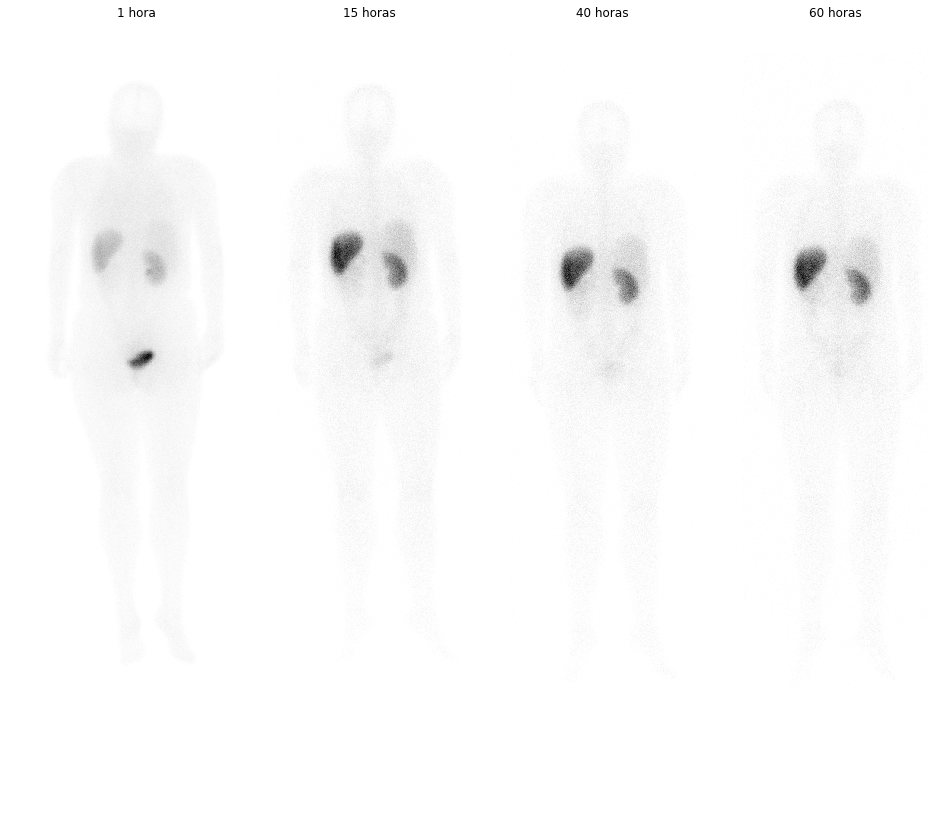

In [2]:
# Cargamos las imágenes de cada tiempo (sólo se usan las post_sc.dcm, que nos parecieron las mejores):

img1_dcm =  dicom.read_file(path_1hr + '/' + imgs_1hr[2])
img1 = img1_dcm.pixel_array

img2_dcm =  dicom.read_file(path_15hr + '/' + imgs_15hr[2])
img2 = img2_dcm.pixel_array

img3_dcm =  dicom.read_file(path_40hr + '/' + imgs_40hr[2])
img3 = img3_dcm.pixel_array

img4_dcm =  dicom.read_file(path_64hr + '/' + imgs_64hr[2])
img4 = img4_dcm.pixel_array

# Buscamos el máximo para normalizar las cuentas a travez de los tiempos (ver la atenuación que se produce)
imax= [np.max(img1),np.max(img2),np.max(img3),np.max(img4)]
imin= [np.min(img1),np.min(img2),np.min(img3),np.min(img4)]

# Graficamos las imágenes en negatvo.
plt.figure(figsize=(16,20))
plt.subplot(141)
plt.imshow(imax[0]-img1, cmap=plt.cm.gray)
plt.title('1 hora')
plt.axis('off')
plt.subplot(142)
plt.imshow(imax[1]-img2, cmap=plt.cm.gray)
plt.title('15 horas')
plt.axis('off')
plt.subplot(143)
plt.imshow(imax[2]-img3, cmap=plt.cm.gray)
plt.title('40 horas')
plt.axis('off')
plt.subplot(144)
plt.imshow(imax[3]-img4, cmap=plt.cm.gray)
plt.title('60 horas')
plt.axis('off')
plt.show()


En esta primera vista podemos notar algunas cuestiones a tener en cuenta:
- La posición del paciente cambia de una adquisición a la otra. Esto se evidencia en la posición del cuerpo completo respecto al origen de la imagen y también en la posición de los pies.
- Para visualizar correctamente el decaimiento, no se debe escalar la visualización a las intensidades presentes en cada imagen, sino que su intensidad debe estar relativa a las intensidades en la priemr imagen.
- Conviene negativizar la imagen, pese a la perdida de la comodidad de la visualización, ya que permite tener un valor de intesidad de cada pixel relativo a la cantidad de cuentas que se adquieren en cada 'elemento' del paciente.

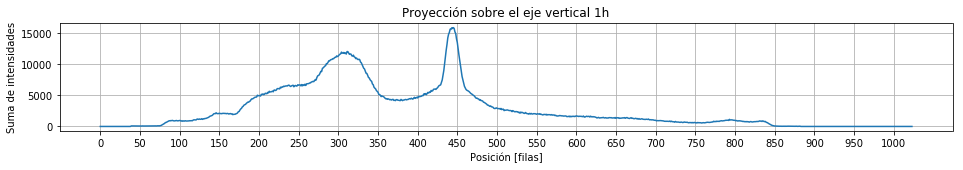

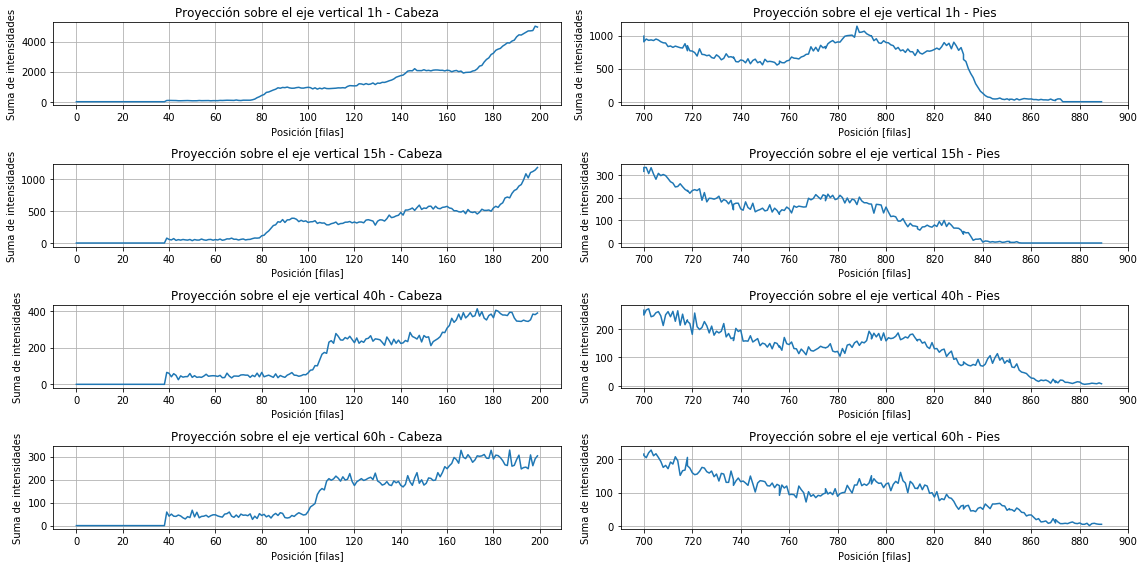

In [28]:
# Se calcula la proyección de la imagen sobre el eje y
proy_y_1_c=np.sum(img1,1)
proy_y_2_c=np.sum(img2,1)
proy_y_3_c=np.sum(img3,1)
proy_y_4_c=np.sum(img4,1)

s=np.shape(proy_y_1_c)

x=(np.linspace(700,889,200)).astype('int16')

plt.figure(figsize=(16,2))
plt.title('Proyección sobre el eje vertical 1h')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(proy_y_1_c)
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 50))

plt.figure(figsize=(16,8))

plt.subplot(421)
plt.title('Proyección sobre el eje vertical 1h - Cabeza')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(proy_y_1_c[0:200])
plt.grid(True)
plt.xticks(np.arange(0, 200+1, 20))

plt.subplot(423)
plt.title('Proyección sobre el eje vertical 15h - Cabeza')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(proy_y_2_c[0:200])
plt.grid(True)
plt.xticks(np.arange(0, 200+1, 20))

plt.subplot(425)
plt.title('Proyección sobre el eje vertical 40h - Cabeza')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(proy_y_3_c[0:200])
plt.grid(True)
plt.xticks(np.arange(0, 200+1, 20))

plt.subplot(427)
plt.title('Proyección sobre el eje vertical 60h - Cabeza')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(proy_y_4_c[0:200])
plt.grid(True)
plt.xticks(np.arange(0, 200+1, 20))
plt.tight_layout()


plt.subplot(422)
plt.title('Proyección sobre el eje vertical 1h - Pies')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(x,proy_y_1_c[700:900])
plt.grid(True)
plt.xticks(np.arange(700, 900+1, 20))

plt.subplot(424)
plt.title('Proyección sobre el eje vertical 15h - Pies')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(x,proy_y_2_c[700:900])
plt.grid(True)
plt.xticks(np.arange(700, 900+1, 20))

plt.subplot(426)
plt.title('Proyección sobre el eje vertical 40h - Pies')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(x,proy_y_3_c[700:900])
plt.grid(True)
plt.xticks(np.arange(700, 900+1, 20))

plt.subplot(428)
plt.title('Proyección sobre el eje vertical 60h - Pies')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [filas]')
plt.plot(x,proy_y_4_c[700:900])
plt.grid(True)
plt.xticks(np.arange(700, 900+1, 20))
plt.tight_layout()

plt.show()

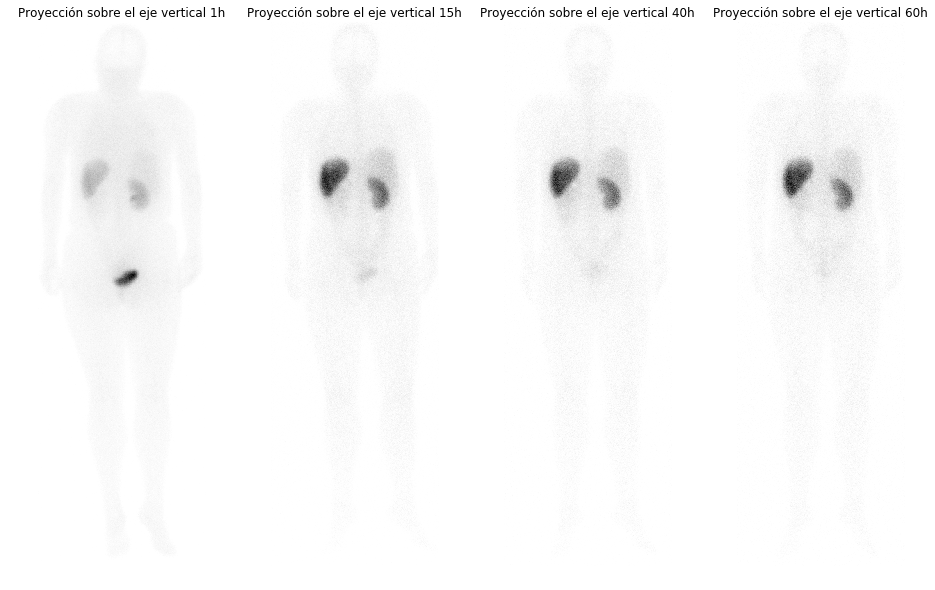

In [22]:
# Se calcula la proyección de la imagen sobre el eje y

plt.figure(figsize=(16,10))

plt.subplot(141)
plt.title('Proyección sobre el eje vertical 1h')
plt.imshow(imax[0]-img1[75:860,:], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(142)
plt.title('Proyección sobre el eje vertical 15h')
plt.imshow(imax[1]-img2[80:865,:], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(143)
plt.title('Proyección sobre el eje vertical 40h')
plt.imshow(imax[2]-img3[100:885,:], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(144)
plt.title('Proyección sobre el eje vertical 60h')
plt.imshow(imax[3]-img4[100:885,:], cmap=plt.cm.gray)
plt.axis('off')

plt.show()

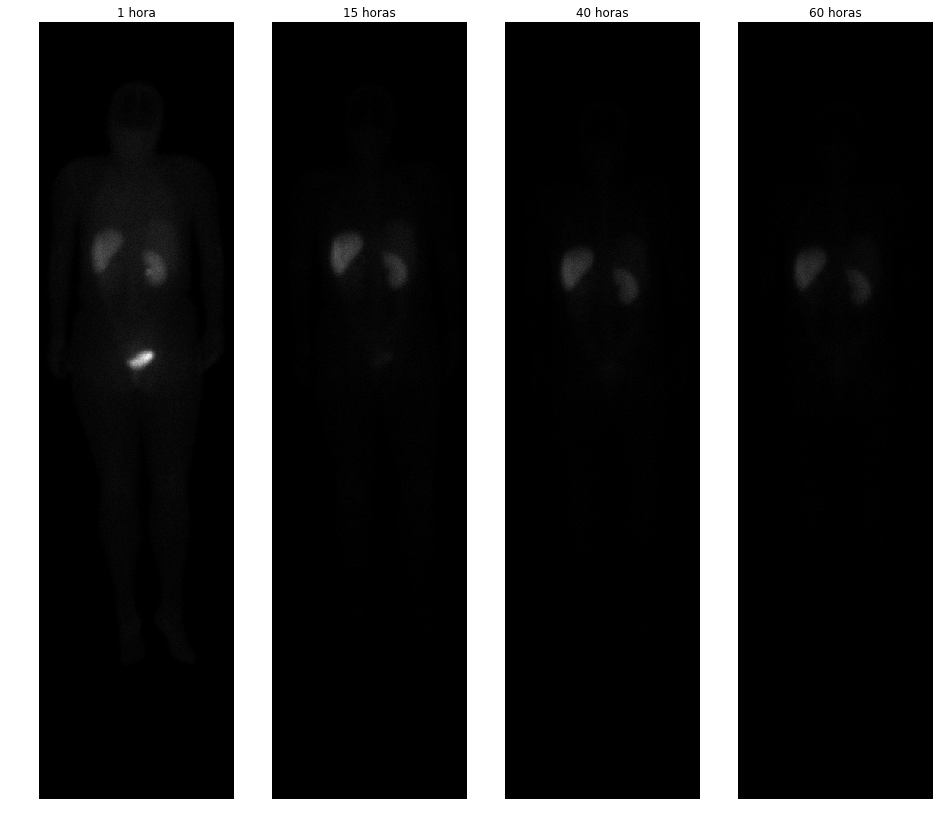

In [3]:
# Graficamos las imágenes seteando el mismo rango de valores en la escala de grises para las tres imágenes
plt.figure(figsize=(16,20))
plt.subplot(141)
plt.imshow(img1, cmap=plt.cm.gray, vmin=imin[0],vmax=imax[0])
plt.title('1 hora')
plt.axis('off')
plt.subplot(142)
plt.imshow(img2, cmap=plt.cm.gray, vmin=imin[0],vmax=imax[0])
plt.title('15 horas')
plt.axis('off')
plt.subplot(143)
plt.imshow(img3, cmap=plt.cm.gray, vmin=imin[0],vmax=imax[0])
plt.title('40 horas')
plt.axis('off')
plt.subplot(144)
plt.imshow(img4, cmap=plt.cm.gray, vmin=imin[0],vmax=imax[0])
plt.title('60 horas')
plt.axis('off')
plt.show()

Se puede ver cómo la intensidad global de la imagen -fundamentalmente en los órganos que mayoritariamente han fijado el radiofármaco- va decayendo a lo largo del tiempo. También se puede ver cómo la región de la vejiga pierde la intensidad casi en forma completa para la segunda imagen y siguientes.

### Parte 1

#### 1-Encuentre en cada caso la distribución de los valores de cada pixel y su evolución en el tiempo.

Se opta por los histogramas de los valores de los pixeles de toda la imágen y en cada tiempo:

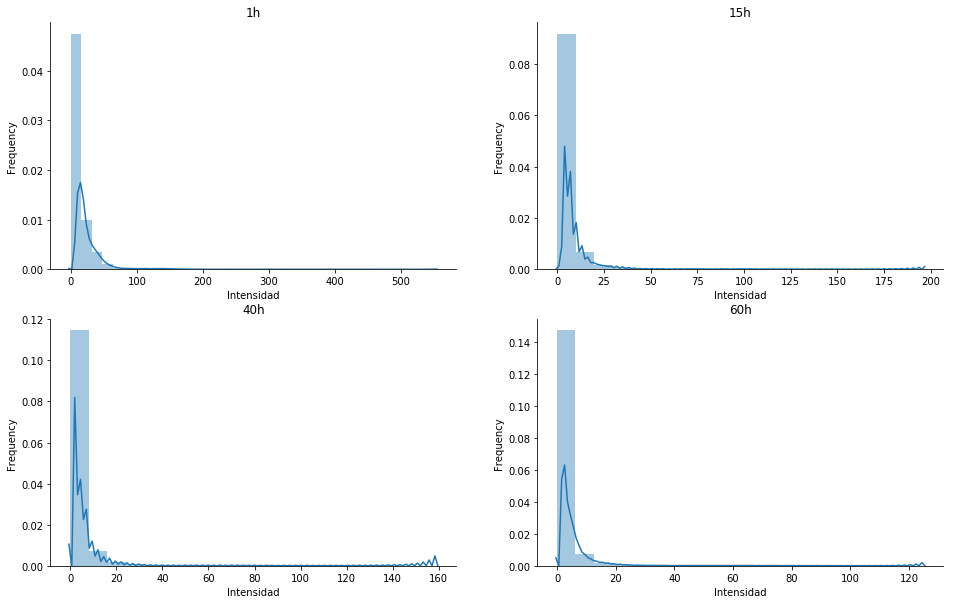

In [4]:
# Analizamos los histogramas de los valores de los pixeles:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.title('1h')
sns.distplot(img1.flatten(),35)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(222)
plt.title('15h')
sns.distplot(img2.flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(223)
plt.title('40h')
sns.distplot(img3.flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(224)
plt.title('60h')
sns.distplot(img4.flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()
plt.show()


Se evidencia que los histogramas de los valores de intensidad no son muy descriptivos, pues hay un número muy grande de pixeles -correspondientes al fondo- que tienen un valor muy cercano a cero. Por esta razón las distribuciones de los pixeles del cuerpo y cada órgano pasan desapercibidas. 

Tampoco se puede notar un cambio marcado en la distribución a lo largo del tiempo, sí se puede ver cómo el rango de intensidades va acortándose acercándose el extremo superior al inferior (las intensidades máximas van disminuyendo).

Quitando los valores cercanos a cero, se encuentran alguna dinámica más interesante:

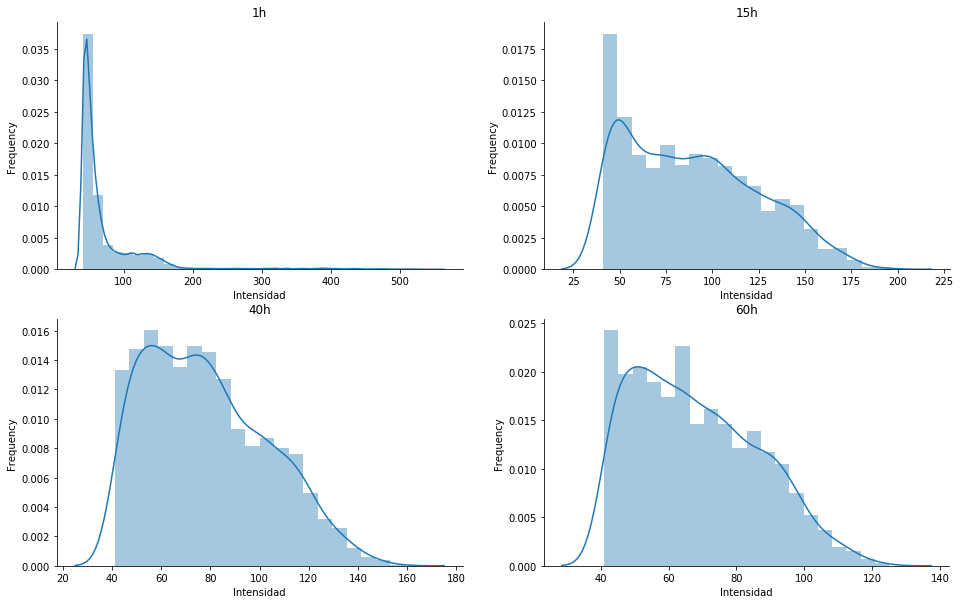

In [5]:
# Analizamos los histogramas de los valores de los pixeles:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.title('1h')
sns.distplot(img1[img1>40].flatten(),35)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(222)
plt.title('15h')
sns.distplot(img2[img2>40].flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(223)
plt.title('40h')
sns.distplot(img3[img3>40].flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(224)
plt.title('60h')
sns.distplot(img4[img4>40].flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
sns.despine()

plt.show()


Estos histogramas de los pixeles cuyas intensidades son superiores a 40 nos muestran que hay alguna distribución en torno a intensidades altas, por ejemplo a las 15h, pero esa distribución seguramente responde a una superposición de distribuciones propias de distintas regiones en la imagen. 

Al analizar la variación a lo largo del tiempo, simplemente se vuelve a notar la disminución del rango y su corrimiento a intensidades bajas. Ambos fenómenos esperables dado el decaimiento del radiofármaco.

Para lograr evidenciar las distribuciones de las intensidades de los píxeles con más detalle, se invierte el orden de los puntos propuestos en las consignas, se realiza primero el inciso 5:
#### Agrupe en un número que considere aceptable los datos de cada imagen


Para esta tarea se utiliza un doble criterio, espacial y por distribución de intensidades. Se trabaja sobre la imagen adquirida una hora después de la administración de raldiofármaco, ya que es donde las regiones correspondientes a los órganos de interés tienen su máxima extensión que luego van disminuyendo por el propio decaimiento del radiofármaco y su metabolismo, que va generando que el órgano sea cada vez menos visible.

Primero podemos ofrecer una vista interactiva de esta imagen, que permite ir explorando el valor de cada pixel en diferentes regiones. Con el objetivo de volver más clara la representación visual, se aplica una paleta de colores, que cabe aclarar no es propia de la modalidad de imagen ni mucho menos.

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

s=np.shape(img1)

# Se define la grilla sobre la cual se va a graficar la 'superficie' y los valores de cada cuadro:
lon = np.linspace(0,s[0]-1,s[0])
lat = np.linspace(0,s[1]-1,s[1])
#v = np.flipud(img1)
v = np.transpose(img1)

# Se define el tipo de gráfico
trace = go.Heatmap(z=v,x=lon,y=lat,zmin=0,zmax=np.max(img1),colorscale='Viridis',colorbar = dict(len=0.7))
data=[trace]

# La configuración 'estética' del mismo
layout = go.Layout(
    title=dict(text='Imagen a 1h de la administración',
               y=0.9),
    xaxis = go.layout.XAxis(visible = False),
    yaxis = go.layout.YAxis(visible=False,scaleanchor = 'x'),
    
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    height=300,
    width=900
)
fig = go.Figure(data=data,layout = layout)

# Graficamos:
py.iplot(fig, filename='labelled-heatmap')

C:\Users\joaco\.conda\envs\diplodatos\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Con el criterio espacial se busca identificar las regiones en donde hay cambios marcados en la intensidad. Para esto se calculan las proyecciones de la imagen sobre cada uno de los ejes.

En el eje y de la imagen:

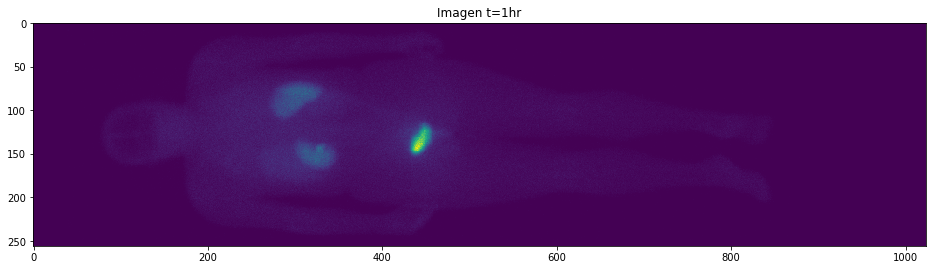

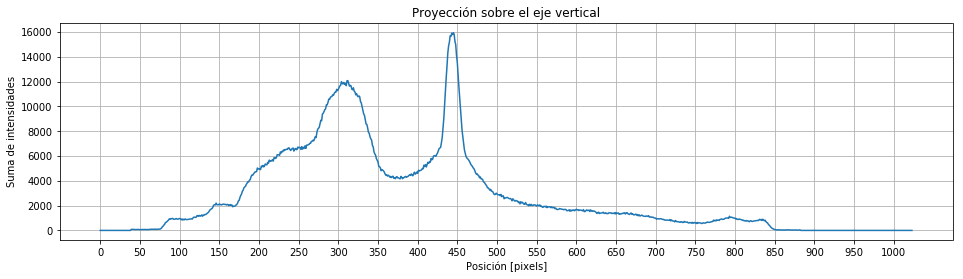

In [7]:
# Se calcula la proyección de la imagen sobre el eje y
proy_y_1_c=np.sum(img1,1)
s=np.shape(proy_y_1_c)

plt.figure(figsize=(16,6))
plt.title('Imagen t=1hr')
plt.imshow(np.transpose(img1[:,:]))

plt.figure(figsize=(16,4))
plt.title('Proyección sobre el eje vertical')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición [pixels]')
plt.plot(proy_y_1_c)
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 50))
plt.show()

La proyección muestra dónde está ubicado el paciente a lo largo del eje y. El amento entre las filas 70 y 170 representa la cabeza y así sucesivmente hasta las filas 780 a 850 que representan los pies.

Se ve como a partir de la fila 260 aproximadamente se identifica un aumento marcado en la intensidad proyectada hasta aproximadamente la fila 360 y lo mismo entre las filas 425 y 470.

Se segmentan esas regiones y se visualizan para ver qué es lo identificado.

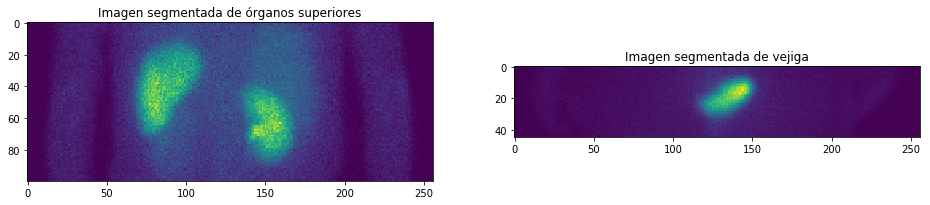

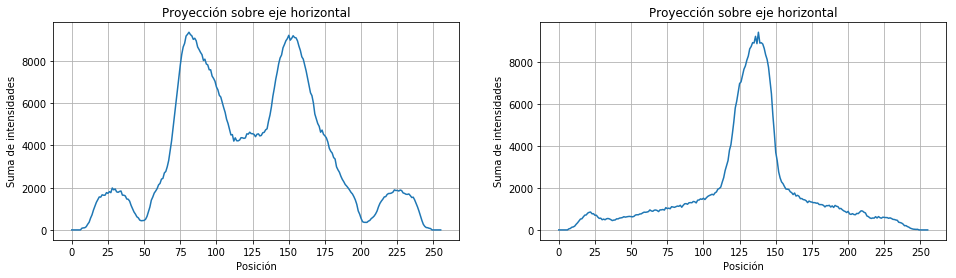

In [8]:
#Recortamos los tramos de mayor intensidad para segmentar los órganos de interes:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Imagen segmentada de órganos superiores')
plt.imshow(img1[260:360,:])
plt.subplot(122)
plt.title('Imagen segmentada de vejiga')
plt.imshow(img1[425:470,:])

proy_x_1_o=np.sum(img1[260:360,:],0)
proy_x_1_v=np.sum(img1[425:470,:],0)
s=np.shape(proy_x_1_o)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(proy_x_1_o)
plt.title('Proyección sobre eje horizontal')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición')
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 25))

s=np.shape(proy_x_1_v)
plt.subplot(122)
plt.plot(proy_x_1_v)
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 25))
plt.title('Proyección sobre eje horizontal')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición')
plt.show()

Siguiendo lo ya dicho, se calcula la proyección a lo largo del eje x. De nuevo se observa como las curvas generadas toman una forma similar a un corte axial del paciente, en donde por ejemplo, los valores entre las columnas 0 a 50 y 200 a 250 en la imagen a la izquierda representan los brazos. 

Las elevaciones marcadas de la intensidad de la proyección indican las regiones de interes en nuestro caso, por lo que se recortan dichas sub-imágenes entre la columna 60 a 120 y 121 a 175 para el caso izquierdo y entre las columnas 110 a 160 para las imagenes a la derecha.

Para cumplir con el propósito original de la consigna, se grafican los histogramas de los valores de intensidad en las sub-regiones identificadas. 

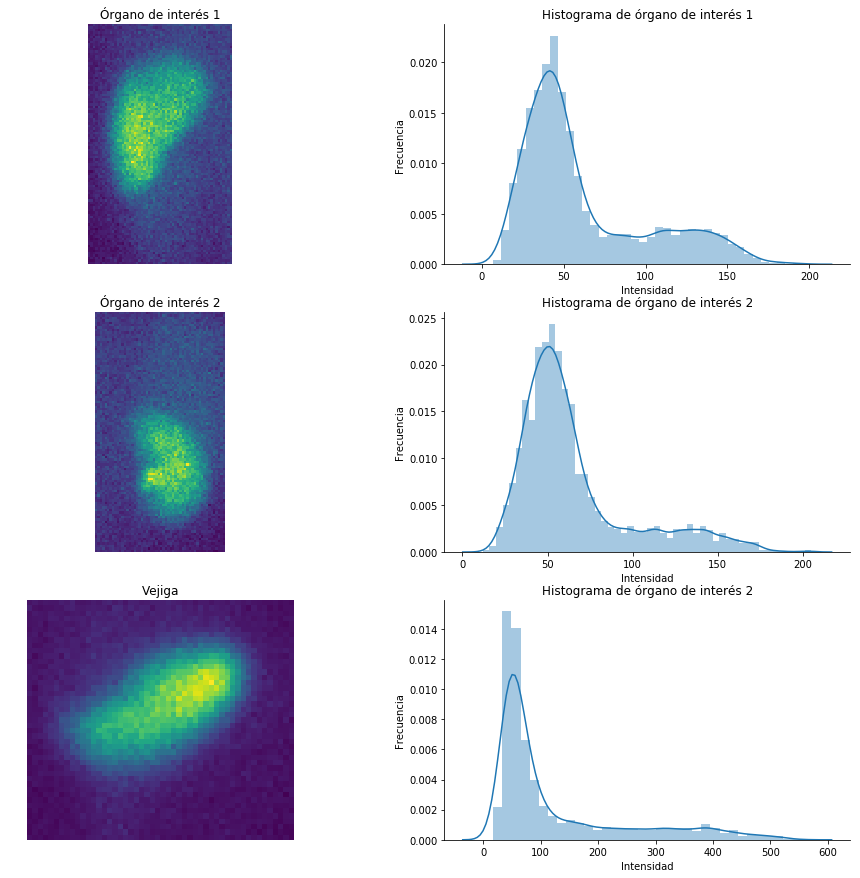

In [9]:
# Nos quedamos con las regiones de interes:

plt.figure(figsize=(16,15))
plt.subplot(321)
plt.title('Órgano de interés 1')
plt.imshow(img1[260:360,60:120])
plt.axis('off')
plt.subplot(322)
sns.distplot(img1[260:360,60:120].flatten())
plt.title('Histograma de órgano de interés 1')
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(323)
plt.title('Órgano de interés 2')
plt.imshow(img1[260:360,121:175])
plt.axis('off')
plt.subplot(324)
sns.distplot(img1[260:360,121:175].flatten())
plt.title('Histograma de órgano de interés 2')
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(325)
plt.title('Vejiga')
plt.imshow(img1[425:470,110:160])
plt.axis('off')
plt.subplot(326)
sns.distplot(img1[425:470,110:160].flatten())
plt.title('Histograma de órgano de interés 2')
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()
plt.show()

En todas las imágenes podemos ver como se forman distribuciones cercanas a la mezcla de dos gaussianas, una con una desviación mucho menor (a la izquierda) correpondiente a los tejidos circundantes a estas representaciones de los órganos, y una de una atenuación mucho menor y una gran dispersión que posiblemente represente la dinámica específica de las intensidades de los órganos en ceustión.

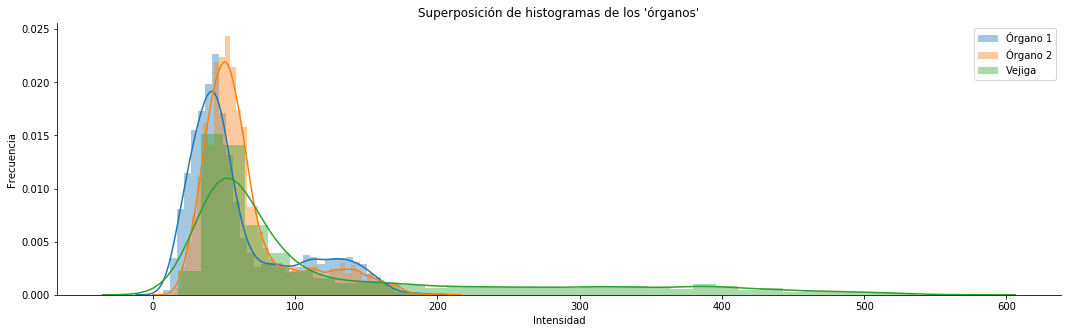

In [10]:
plt.figure(figsize=(18,5))
plt.title('Superposición de histogramas de los \'órganos\'')
sns.distplot(img1[260:360,60:120].flatten())
sns.distplot(img1[260:360,121:175].flatten())
sns.distplot(img1[425:470,110:160].flatten())
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
plt.legend(['Órgano 1', 'Órgano 2', 'Vejiga'])
sns.despine()
plt.show()

Si superponemos los histogramas, podemos confirmar que la primer gaussiana, común a las tres imágenes y a los trés histogramas, representa al cuerpo circundate a los órganos; mientras que las variaciones entre las segundas gaussianas confirman que se trata de distintos órganos.

También se observa cómo las intensidades en vejiga son lás más elevadas, mientras qué las distribuciones de las intensidades de los otros dos órganos son muy similares, casi que se superponen.

##### Dejando atrás el análisis de las frecuencias de aparición de las intesidades, pasamos a estudiar la distribución espacial de dichas intensidades.

In [11]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

# Read data from a csv
z_data1 = img1[260:360,60:120]
z_data2 = img1[260:360,121:175]
z_data3 = img1[425:470,110:160]

scene = dict(
    xaxis=dict(
        gridcolor='rgb(0,0,0)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(250,250,250)'
    ),
    yaxis=dict(
        gridcolor='rgb(0,0,0)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(250,250,250)',
        
    ),
    zaxis=dict(
        gridcolor='rgb(0,0,0)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(250, 250,250)'
    )
)

fig = tools.make_subplots(rows=1, cols=3,
                          specs=[[{'is_3d': True}, {'is_3d': True},{'is_3d': True}]])

# adding surfaces to subplots.
fig.append_trace(dict(type='surface', z=z_data1, colorscale='RdBu',
                      scene='scene1', showscale=False), 1, 1)
fig.append_trace(dict(type='surface', z=z_data2, colorscale='RdBu',
                      scene='scene2', showscale=False), 1, 2)
fig.append_trace(dict(type='surface', z=z_data3, colorscale='RdBu',
                      scene='scene3', showscale=False), 1, 3)

fig['layout'].update(title='Organos identificados y la distribución espacial de los valores de sus píxeles',
                     height=600, width=1500)
fig['layout']['scene1'].update(scene)
fig['layout']['scene2'].update(scene)
fig['layout']['scene3'].update(scene)

py.iplot(fig, file_name='multiple_plots')

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]  [ (1,3) scene3 ]



C:\Users\joaco\.conda\envs\diplodatos\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Para tener un punto común de comparación de las tres distribución espaciales, se repiten los mismos graficos de manera estática:

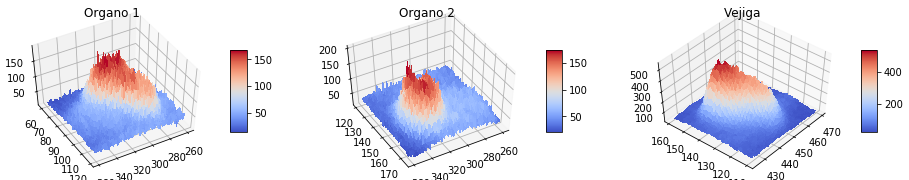

In [12]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig = plt.figure(figsize=(16,3))

ax = fig.add_subplot(1,3,1,projection='3d')
X = np.arange(260,360,1)
Y = np.arange(60,120,1)
X, Y = np.meshgrid(X, Y)
Z = img1[X,Y]
ax.view_init(50, 60)
plt.title('Organo 1')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(1,3,2,projection='3d')
X = np.arange(260,360,1)
Y = np.arange(121,175,1)
X, Y = np.meshgrid(X, Y)
Z = img1[X,Y]
ax.view_init(50, 60)
plt.title('Organo 2')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(1,3,3,projection='3d')
X = np.arange(425,470,1)
Y = np.arange(110,160,1)
X, Y = np.meshgrid(X, Y)
Z = img1[X,Y]
ax.view_init(50, 220)
plt.title('Vejiga')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


En definitiva se puede ver como en cada caso, se obtienen distribuciones que podrían azemejarse a una mezcla de gaussianas bivariadas. Vemos que en la vejiga el cambio en la intensidad de los píxeles es mucho más suave, lo que puede deberse a que es un mero contenedor de la orina con radiofármaco. En los organos, sin embargo, tenemos una 'superficie' mucho más escarpada, que podría deberse a la distribución del radiofármaco en el tejido.

En los tres casos se puede ver cómo hay subregiones de intensidad máxima y a medida que nos alejamos de ellas la intesidad disminuye. En el caso de 'órgano 2' pareciera haber dos de esas sub-regiones de valores máximos.

En el caso de la vejiga, la menor intensidad de los pixeles inferiores, puede tener un correlato 

#### De la información adquirida en los gráficos anteriores, se separa la imagen en 5 categorías constituyentes:  Fondo, Cuerpo, Órgano 1, Órgano 2, Vejiga

Para quitarles un poco de rigidez a los límites definidos por umbrales, suavizar bordes muy ruidosos y buscando que las regiones definidas también respondan a un criterio espacial, se realizan algunas operaciones de morfología matemática y mejora de imágenes. Se aplican operaciones de apertura, y cierre, que permiten rellenar espacios estre pixeles cercanos y eliminar los pixeles no conectados respectivamente.

Las regiones resultantes son:

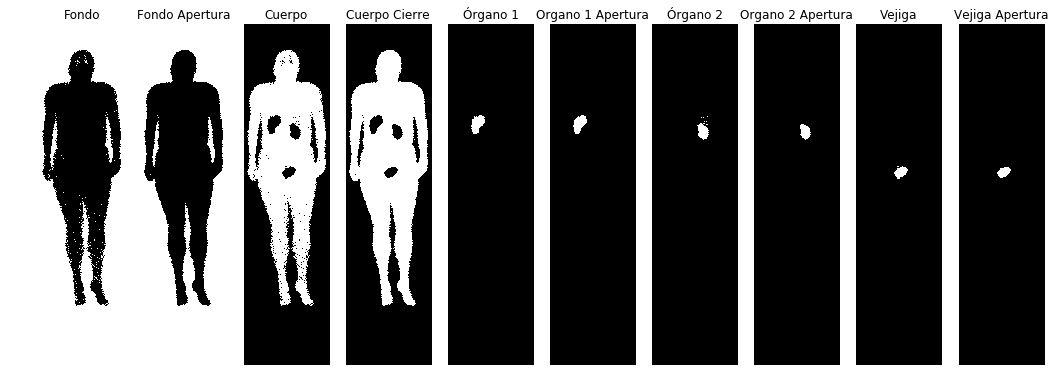

In [13]:
# Separamos la imagen en 4 categorías constituyentes: Fondo, Cuerpo, Órganos target del radiofármaco, Vejiga.

fondo = img1.copy()
cuerpo = img1.copy()
organos = img1.copy()
vejiga = img1.copy()

fondo[fondo<7] = 1  
fondo[fondo>=7] = 0

cuerpo[cuerpo<7] = 0
cuerpo[cuerpo>75] = 0
cuerpo[cuerpo!=0] = 1

organos[organos<75] = 0
organos[organos>=75] = 1
vejiga = organos.copy()
organo1 = organos.copy()
organo2 = organos.copy()
organo1[400:,:] = 0
organo1[:,120:] = 0
organo2[400:,:] = 0
organo2[:,0:120] = 0
vejiga[0:400,:] = 0

# Se muestra en blanco cada una de las regiones seleccionadas y negro el resto de las regiones.

plt.figure(figsize=(18,25))

plt.subplot(1,10,1)
plt.title('Fondo')
plt.imshow(fondo, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1,10,3)
plt.title('Cuerpo')
plt.imshow(cuerpo, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,5)
plt.title('Órgano 1')
plt.imshow(organo1, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,7)
plt.title('Órgano 2')
plt.imshow(organo2, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,9)
plt.title('Vejiga')
plt.imshow(vejiga, cmap=plt.cm.gray)
plt.axis('off')

# Para dejar regiones más simples segmentadas, se realizan opraciones de cierre y apertura. 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fondo = cv2.morphologyEx(fondo, cv2.MORPH_OPEN, kernel)
organo1 = cv2.morphologyEx(organo1, cv2.MORPH_OPEN, kernel)
organo2 = cv2.morphologyEx(organo2, cv2.MORPH_OPEN, kernel)
cuerpo = cv2.morphologyEx(cuerpo, cv2.MORPH_CLOSE, kernel)
vejiga = cv2.morphologyEx(vejiga, cv2.MORPH_OPEN, kernel)

plt.subplot(1,10,2)
plt.title('Fondo Apertura')
plt.imshow(fondo, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,4)
plt.title('Cuerpo Cierre')
plt.imshow(cuerpo, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,6)
plt.title('Organo 1 Apertura')
plt.imshow(organo1, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,8)
plt.title('Organo 2 Apertura')
plt.imshow(organo2, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(1,10,10)
plt.title('Vejiga Apertura')
plt.imshow(vejiga, cmap=plt.cm.gray)
plt.axis('off')

# Creamos máscaras lógicas de cada región
m1 = fondo>0
m2 = cuerpo>0
m3 = organo1>0
m4 = organo2>0
m5 = vejiga>0

Para que el problema de registración influya lo menos posible, se toma como referencia el vértice de la cabeza del paciente. Para ello se recorta la imagen de manera que la primera fila de la misma se corresponda con las dos filas anteriores a aquella en donde aparece la región "cuerpo" en la imagen original. 

Esto se realiza para tratar de corregir la posición del paciente a lo largo de la imagen entendiendo que la distancia de los órganos de interés a este punto de referencia varía muy poco o no varía entre las adquisiciónes. 

Pese a esta corrección, sigue existiendo un problema con la coregistración de las piernas del paciente que han cambiado su posición entre las imágenes, pero su corrección escapa a las tecnicas lineales y por lo tanto a los alcances y objetivos de este curso.

Finalmente con estas subregiones definidas, volvemos a graficar los histogramas correspondientes. En este caso, se genera un gráfico por región y en cada uno de ellos un histograma por cada cada tiempo de adquisición:

In [ ]:
# Para tener una idea más clara de la evolución del valor de los pixeles a lo largo del tiempo 
# graficamos loshistogramas por regiones superponiendo los distintos tiempos.

plt.figure(figsize=(16,22))
plt.subplot(411)
plt.title('Cuerpo')
sns.distplot(img1[m2].flatten(),20)
sns.distplot(img2[m2].flatten(),20)
sns.distplot(img3[m2].flatten(),20)
sns.distplot(img4[m2].flatten(),20)
plt.legend(['1h','15h','40h','60h'])
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(412)
plt.title('Órgano 1')
sns.distplot(img1[m3].flatten(),20)
sns.distplot(img2[m3].flatten(),20)
sns.distplot(img3[m3].flatten(),20)
sns.distplot(img4[m3].flatten(),20)
plt.legend(['1h','15h','40h','60h'])
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(413)
plt.title('Órgano 2')
sns.distplot(img1[m4].flatten(),20)
sns.distplot(img2[m4].flatten(),20)
sns.distplot(img3[m4].flatten(),20)
sns.distplot(img4[m4].flatten(),20)
plt.legend(['1h','15h','40h','60h'])
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()

plt.subplot(414)
plt.title('Vejiga')
sns.distplot(img1[m5].flatten(),20)
sns.distplot(img2[m5].flatten(),20)
sns.distplot(img3[m5].flatten(),20)
sns.distplot(img4[m5].flatten(),20)
plt.legend(['1h','15h','40h','60h'])
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
sns.despine()

#ply.tight_layout()

plt.show()

Se orserva que con el paso del tiempo hay un viraje de los valores de los pixeles en cada región desde intensidades altas hacia otras menores. 

Se puede ver en la superposición de histogramas que ese pasaje es progresivo. Por ejemplo en el caso de los órganos 1 y 2, vemos en azul -1h- que todos los pixeles en la región tenían valores entre 75 y 200. Luego a las 15h van apareciendo pixeles de bajas intensidades disminuyendo la frecuencia de los de alto valor. A las 40h ya practicamente las intensiaddes no superan el valor 170, y crece significativamente el número de pixeles entre 0 y 50. Finalmente en rojo las intensidasdes no superan el 150. 

El histograma de la vejiga muestra que casi la totalidad de los pixeles se mueven a intensidades muy bajas después de la primera imagen. Esto se peude deber a que el paciente orina y con ello evacúa el radiofármaco allí presente.

__En resumen, para todas las regiones se observa el fenómeno previsto, pues la intensidad (debida al radiofármaco) disminuye a medida que decae y es metabolizado.__

#### 2. Realizar análisis de estadística descriptiva sobre los datos, tanto en una como en múltiples variables. Moda, media, mediana y desviación estándar de un producto en particular.

De cada una de las regiones indicadas en este gráfico:

In [ ]:
# Creamos una sola imagen que contiene las etiquetas de cada región:

labels = cuerpo.copy()*1;
labels[m3]=2;
labels[m4]=3;
labels[m5]=4;

fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(np.transpose(labels[75:850,:]))
ax.set_title('Regiones')
plt.axis('off')
cbar = fig.colorbar(cax, ticks=[0,1,2,3,4])
cbar.ax.set_yticklabels(['Fondo','Cuerpo','Órgano1','Órgano2','Vejiga'])  # horizontal colorbar

plt.show()


In [ ]:
import numpy.matlib

# Para aplicar conceptos vistos en la materia y facilitar calculos posteriores 
# se transformaron las imágenes a un pandas Data Frame

s=np.shape(labels)                # Generamos un vector de longitud igual al largo de la imagen (número de filas), 
a=np.asarray(np.arange(0,s[0],1)) # cuyos elementos van de cero al número de filas
a=np.matlib.repmat(a,s[1],1)      # repetimos el vector a lo largo de las columnas, es decir tengo que cada 
                                  # elemento contiene el número de fila que posee
a=np.transpose(a)                 
y=a.flatten()                     # lo llevo a un vector, que tiene los números de fila de cada elemento

b=np.asarray(np.arange(0,s[1],1)) # Igual al caso anterior pero con las columnas
b=np.matlib.repmat(b,s[0],1)
x=b.flatten()

label_flat=labels.flatten()       # Un vector con la etiqueta ed cada elemento
int1_flat=img1.flatten()          # Un vector por intensidad en cada tiempo
int2_flat=img2.flatten()
int3_flat=img3.flatten()
int4_flat=img4.flatten()
l=np.shape(int1_flat)
tiempo=np.zeros(l[0])
tiempo1=tiempo+1                  # Vector de ceros que luego va a tener cada uno de los 4 tiempos
tiempo2=tiempo+15
tiempo3=tiempo+40
tiempo4=tiempo+60

Dosis_1=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_1['x']=x
Dosis_1['y']=y
Dosis_1['Intensidad']=int1_flat
Dosis_1['Etiqueta']=label_flat
Dosis_1['Tiempo']=tiempo1

Dosis_2=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_2['x']=x
Dosis_2['y']=y
Dosis_2['Intensidad']=int2_flat
Dosis_2['Etiqueta']=label_flat
Dosis_2['Tiempo']=tiempo2

Dosis_3=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_3['x']=x
Dosis_3['y']=y
Dosis_3['Intensidad']=int3_flat
Dosis_3['Etiqueta']=label_flat
Dosis_3['Tiempo']=tiempo3

Dosis_4=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_4['x']=x
Dosis_4['y']=y
Dosis_4['Intensidad']=int4_flat
Dosis_4['Etiqueta']=label_flat
Dosis_4['Tiempo']=tiempo4

d={0: 'fondo',1: 'cuerpo',2: 'organo1',3: 'organo2',4: 'vejiga'}

frames = [Dosis_1,Dosis_2,Dosis_3,Dosis_4]
Dosis = pd.concat(frames)
Dosis =Dosis.replace({"Etiqueta": d})

Dosis.to_pickle('Dosis_database_b')
#Dosis = pd.read_pickle('Dosis_database_b')


Calculamos el resumen estadísico para cada región y cada tiempo:

Fondo:

In [ ]:
# Calculamos los valores del resumen estadístico:

Fondo=[Dosis[(Dosis.Tiempo==1) & (Dosis.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose(),
       Dosis[(Dosis.Tiempo==15) & (Dosis.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose(),
       Dosis[(Dosis.Tiempo==40) & (Dosis.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose(),
       Dosis[(Dosis.Tiempo==60) & (Dosis.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose()]
Fondo = pd.concat(Fondo)
Cuerpo=[Dosis[(Dosis.Tiempo==1) & (Dosis.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose(),
        Dosis[(Dosis.Tiempo==15) & (Dosis.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose(),
        Dosis[(Dosis.Tiempo==40) & (Dosis.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose(),
        Dosis[(Dosis.Tiempo==60) & (Dosis.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose()]
Cuerpo = pd.concat(Cuerpo)
Organo1=[Dosis[(Dosis.Tiempo==1) & (Dosis.Etiqueta=='organo1')].Intensidad.describe().to_frame().transpose(),
         Dosis[(Dosis.Tiempo==15) & (Dosis.Etiqueta=='organo1')].Intensidad.describe().to_frame().transpose(),
         Dosis[(Dosis.Tiempo==40) & (Dosis.Etiqueta=='organo1')].Intensidad.describe().to_frame().transpose(),
         Dosis[(Dosis.Tiempo==60) & (Dosis.Etiqueta=='organo1')].Intensidad.describe().to_frame().transpose()]
Organo1 = pd.concat(Organo1)
Organo2=[Dosis[(Dosis.Tiempo==1) & (Dosis.Etiqueta=='organo2')].Intensidad.describe().to_frame().transpose(),
         Dosis[(Dosis.Tiempo==15) & (Dosis.Etiqueta=='organo2')].Intensidad.describe().to_frame().transpose(),
         Dosis[(Dosis.Tiempo==40) & (Dosis.Etiqueta=='organo2')].Intensidad.describe().to_frame().transpose(),
         Dosis[(Dosis.Tiempo==60) & (Dosis.Etiqueta=='organo2')].Intensidad.describe().to_frame().transpose()]
Organo2 = pd.concat(Organo2)
Vejiga=[Dosis[(Dosis.Tiempo==1) & (Dosis.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose(),
        Dosis[(Dosis.Tiempo==15) & (Dosis.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose(),
        Dosis[(Dosis.Tiempo==40) & (Dosis.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose(),
        Dosis[(Dosis.Tiempo==60) & (Dosis.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose()]
Vejiga = pd.concat(Vejiga)

Fondo.index=[1,15,40,60]
Fondo.columns=['Cuenta','Media','Std','Minimo','25%','50%','75%','Maximo']
Cuerpo.index=[1,15,40,60]
Cuerpo.columns=['Cuenta','Media','Std','Minimo','25%','50%','75%','Maximo']
Organo1.index=[1,15,40,60]
Organo1.columns=['Cuenta','Media','Std','Minimo','25%','50%','75%','Maximo']
Organo2.index=[1,15,40,60]
Organo2.columns=['Cuenta','Media','Std','Minimo','25%','50%','75%','Maximo']
Vejiga.index=[1,15,40,60]
Vejiga.columns=['Cuenta','Media','Std','Minimo','25%','50%','75%','Maximo']

Fondo

Cuerpo:

In [ ]:
Cuerpo

Órgano 1:

In [ ]:
Organo1

Órgano 2:

In [ ]:
Organo2

Vejiga:

In [ ]:
Vejiga

#### 3. Defina de alguna forma la información que pueda considerarse “ruido” y encuentre outliers.

#### Definición de ruido:
Son aquellos pixeles cuya intensidad en la región escapa a 1.5 veces el rango intercuartílico, es decir los outliers. En términos prácticos, son aquellos pixeles que tienen intensidades 'mucho' menores o mayores a los esperables en la región y por lo tanto puden deberse a 'ruido' o artefactos en la adquisición.

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(321)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "fondo"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis[Dosis.Etiqueta=='fondo'], whis=1.5)

plt.subplot(322)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "cuerpo"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis[Dosis.Etiqueta=='cuerpo'], whis=1.5)

plt.subplot(323)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "órgano 1"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis[Dosis.Etiqueta=='organo1'], whis=1.5)

plt.subplot(324)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "órgano 2"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis[Dosis.Etiqueta=='organo2'], whis=1.5)

plt.subplot(325)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "vejiga"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis[Dosis.Etiqueta=='vejiga'], whis=1.5)
plt.show()

In [ ]:
## quiero que en la columna outlier aparezca un true en cada outlier para dibujarlo
#out_std=np.zeros((1024,256,4))
#k=0
#for i in [1,15,40,60]:
#    Dosis['Outlier']= False
#    aux=(Dosis.Intensidad > (Fondo.Media[i] + 3 * Fondo.Std[i]))& (Dosis.Etiqueta=='fondo') & (Dosis.Tiempo==i)
#    Dosis.loc[aux,'Outlier']= True
#    aux=(Dosis.Intensidad > (Cuerpo.Media[i] + 3 * Cuerpo.Std[i]))& (Dosis.Etiqueta=='cuerpo') & (Dosis.Tiempo==i)
#    Dosis.loc[aux,'Outlier']= True
#    aux=(Dosis.Intensidad > (Organo1.Media[i] + 3 * Organo1.Std[i]))& (Dosis.Etiqueta=='organo1') & (Dosis.Tiempo==i)
#    Dosis.loc[aux,'Outlier']= True
#    aux=(Dosis.Intensidad > (Organo2.Media[i] + 3 * Organo2.Std[i]))& (Dosis.Etiqueta=='organo2') & (Dosis.Tiempo==i)
#    Dosis.loc[aux,'Outlier']= True
#    aux=(Dosis.Intensidad > (Vejiga.Media[i] + 3 * Vejiga.Std[i]))& (Dosis.Etiqueta=='vejiga') & (Dosis.Tiempo==i)
#    Dosis.loc[aux,'Outlier']= True
#    Dosis.Outlier.replace({False: 0 , True: 1})
#    aux = np.array(Dosis.Outlier[Dosis.Tiempo==i])
#    out_std[:,:,k] = np.reshape(aux, (1024,256))
#    k=k+1

out_iqr = np.zeros((1024,256,4))
k=0
Dosis['Outlier']= 7
for i in [1,15,40,60]:
    aux=(Dosis.Intensidad > (Fondo['75%'][i] + 1.5 * (Fondo['75%'][i]-Fondo['25%'][i])))& (Dosis.Etiqueta=='fondo') & (Dosis.Tiempo==i)
    Dosis.loc[aux,'Outlier']= 1
    aux=(Dosis.Intensidad > (Cuerpo['75%'][i] + 1.5 * (Cuerpo['75%'][i]-Cuerpo['25%'][i]))) \
                    & (Dosis.Etiqueta=='cuerpo') & (Dosis.Tiempo==i)
    Dosis.loc[aux,'Outlier']= 2
    aux=(Dosis.Intensidad > (Organo1['75%'][i] + 1.5 * (Organo1['75%'][i]-Organo1['25%'][i])))\
                    & (Dosis.Etiqueta=='organo1') & (Dosis.Tiempo==i)
    Dosis.loc[aux,'Outlier']= 3
    aux=(Dosis.Intensidad > (Organo2['75%'][i] + 1.5 * (Organo2['75%'][i]-Organo2['25%'][i])))\
                    & (Dosis.Etiqueta=='organo2') & (Dosis.Tiempo==i)
    Dosis.loc[aux,'Outlier']= 4
    aux=(Dosis.Intensidad > (Vejiga['75%'][i] + 1.5 * (Vejiga['75%'][i]-Vejiga['25%'][i])))\
                    & (Dosis.Etiqueta=='vejiga') & (Dosis.Tiempo==i)
    Dosis.loc[aux,'Outlier']= 5
    #Dosis.Outlier.replace({False: 0 , True: 1})
    aux = np.array(Dosis.Outlier[Dosis.Tiempo==i])
    out_iqr[:,:,k] = np.reshape(aux, (1024,256))
    k=k+1
    
#plt.figure(figsize=(16,10))
#
#plt.subplot(141)
#plt.title('Outliers del tiempo 1 -1hs')
#plt.imshow(out_std[:,:,0])
#plt.axis('off')
#
#plt.subplot(142)
#plt.title('Outliers del tiempo 2 -15hs')
#plt.imshow(out_std[:,:,1])
#plt.axis('off')
#
#plt.subplot(143)
#plt.title('Outliers del tiempo 3 -40hs')
#plt.imshow(out_std[:,:,2])
#plt.axis('off')
#
#plt.subplot(144)
#plt.title('Outliers del tiempo 4 -60hs')
#plt.imshow(out_std[:,:,3])
#plt.axis('off')

plt.figure(figsize=(16,10))

plt.subplot(141)
plt.title('Outliers del tiempo 1 -1hs')
plt.imshow(out_iqr[:,:,0],vmin=0,vmax=7,cmap='Dark2')
plt.axis('off')

plt.subplot(142)
plt.title('Outliers del tiempo 2 -15hs')
plt.imshow(out_iqr[:,:,1],vmin=0,vmax=7,cmap='Dark2')
plt.axis('off')

plt.subplot(143)
plt.title('Outliers del tiempo 3 -40hs')
plt.imshow(out_iqr[:,:,2],vmin=0,vmax=7,cmap='Dark2')
plt.axis('off')

plt.subplot(144)
plt.title('Outliers del tiempo 4 -60hs')
plt.imshow(out_iqr[:,:,3],vmin=0,vmax=7,cmap='Dark2')
plt.axis('off')

plt.show()

#### 4. ¿Existe alguna probabilidad condicional entre valores de pixels entre diferentes tiempos de adquisición? ¿Conviene tomar valores de píxeles directamente o es preferible agruparlos en grupos? Justifique.

Conviene agrupar los pixeles y en todo caso obtener un valor representativo del grupo, ya que es muy dificil garantizar un registrado perfecto de las imágenes. Por esta razón, un pixel (x,y) en el el tiempo t1, no necesariamente se corresponda con el mismo tejido/elemento del cuerpo en en el instante t2. Los outliers mostrados en el punto anterior lo demuestran.

Probabilidad condicional a lo largo del tiempo:
Para determinarla se utiliza una tabla de doble entrada que posee 3 intervalos de intensidades, de cro a 7, de 7 a 75 y de 75 en adelante, que son respectivamente los que identifican a tres regiones, fondo, cuerpo y órganos respectivamente. Entonces en cada fila tenemos cómo se distribuyeron en el tiempo siguiente los pixeles que en el tiempo anterior estaban en el intervalo correspondiente a esa fila.

In [ ]:
Data_2 = pd.DataFrame(columns=['x','y','Etiqueta','I1','I2','I3','I4','Rango_1h','Rango_15h','Rango_40h','Rango_60h'])
Data_2.x = Dosis.x[Dosis.Tiempo==1]
Data_2.y = Dosis.y[Dosis.Tiempo==1]
Data_2.Etiqueta = Dosis.Etiqueta[Dosis.Tiempo==1]
Data_2.I1 = Dosis.Intensidad[Dosis.Tiempo==1]
Data_2.I2 = Dosis.Intensidad[Dosis.Tiempo==15]
Data_2.I3 = Dosis.Intensidad[Dosis.Tiempo==40]
Data_2.I4 = Dosis.Intensidad[Dosis.Tiempo==60]

#Data_2=Data_2.copy()

Data_2.loc[Data_2.I1<7,'Rango_1h']='0-7'
aux=((Data_2.I1>=7) & (Data_2.I1<75))
Data_2.loc[aux,'Rango_1h']='7-75'
Data_2.loc[Data_2.I1>=75,'Rango_1h']='75-end'

Data_2.loc[Data_2.I2<7,'Rango_15h']='0-7'
aux=((Data_2.I2>=7) & (Data_2.I2<75))
Data_2.loc[aux,'Rango_15h']='7-75'
Data_2.loc[Data_2.I2>=75,'Rango_15h']='75-end'

Data_2.loc[Data_2.I3<7,'Rango_40h']='0-7'
aux=((Data_2.I3>=7) & (Data_2.I3<75))
Data_2.loc[aux,'Rango_40h']='7-75'
Data_2.loc[Data_2.I3>=75,'Rango_40h']='75-end'

Data_2.loc[Data_2.I2<7,'Rango_60h']='0-7'
aux=((Data_2.I4>=7) & (Data_2.I4<75))
Data_2.loc[aux,'Rango_60h']='7-75'
Data_2.loc[Data_2.I4>=75,'Rango_60h']='75-end'

t1_15 = pd.crosstab(index=Data_2.Rango_1h, columns=Data_2.Rango_15h,normalize='index')
t1_40 = pd.crosstab(index=Data_2.Rango_1h, columns=Data_2.Rango_40h,normalize='index')
t1_60 = pd.crosstab(index=Data_2.Rango_1h, columns=Data_2.Rango_60h,normalize='index')

In [ ]:
t2_40 = pd.crosstab(index=Data_2.Rango_15h, columns=Data_2.Rango_40h,normalize='index')
t2_60 = pd.crosstab(index=Data_2.Rango_15h, columns=Data_2.Rango_60h,normalize='index')

In [ ]:
t3_60 = pd.crosstab(index=Data_2.Rango_40h, columns=Data_2.Rango_60h,normalize='index')

In [ ]:
plt.figure(figsize=(20,13))
plt.subplot(231)
sns.heatmap(t1_15)
sns.despine()
plt.title('Probabilidad condicional de la \n intensidad con el tiempo (1h-15h)')
plt.subplot(232)
sns.heatmap(t1_40)
sns.despine()
plt.title('Probabilidad condicional de la \n intensidad con el tiempo (1h-40h)')
plt.subplot(233)
sns.heatmap(t1_60)
sns.despine()
plt.title('Probabilidad condicional de la \n intensidad con el tiempo (1h-60h)')
plt.subplot(234)
sns.heatmap(t2_40)
sns.despine()
plt.title('Probabilidad condicional de la \n intensidad con el tiempo (15h-40h)')
plt.subplot(235)
sns.heatmap(t2_60)
sns.despine()
plt.title('Probabilidad condicional de la \n intensidad con el tiempo (15h-60h)')
plt.subplot(236)
sns.heatmap(t3_60)
sns.despine()
plt.title('Probabilidad condicional de la \n intensidad con el tiempo (40h-60h)')

plt.show()

Existe una probabilidad condicional de que dada una región con una intensidad H el tiempo t1, la intensidad del tiempo t2 siguiente está condicionada por la primera, y estas se relaciónan con el decaimiento del radiofármaco. Es decir si la intensidad de una región en un tiempo estaba en un determinado rango, es muy probable que esa intensidad esté en un rango menor en el tiempo siguiente.

#### 5- Busque coeficientes de correlación entre grupos del mismo tiempo y grupos de distintos tiempos. Definido un conjunto de píxeles dentro de un grupo en la primera imagen, este grupo de píxeles debe pertenecer al mismo grupo en los tiempos siguientes.

Para ver la correlación entre distintas regiones en un mismo tiempo, decidimos utilizar un criterio espacial. Se busca la correlación entre intensidad del pixel vs distancia al máximo en la región.

Primero encontramos los máximos:

In [ ]:
# Calulamos los máximos para cada región y los graficamos.
#cm_fondo = np.average(Data_2[Data_2.Etiqueta=='fondo'][['x','y']], 
#                      axis=0, weights=Data_2.I1[Data_2.Etiqueta=='fondo'])
#cm_cuerpo = np.average(Data_2[Data_2.Etiqueta=='cuerpo'][['x','y']],
#                      axis=0, weights=Data_2.I1[Data_2.Etiqueta=='cuerpo'])
#cm_organo1 = np.average(Data_2[Data_2.Etiqueta=='organo1'][['x','y']],
#                      axis=0, weights=Data_2.I1[Data_2.Etiqueta=='organo1'])
#cm_organo2 = np.average(Data_2[Data_2.Etiqueta=='organo2'][['x','y']], 
#                      axis=0, weights=Data_2.I1[Data_2.Etiqueta=='organo2'])
#cm_vejiga = np.average(Data_2[Data_2.Etiqueta=='vejiga'][['x','y']],
#                      axis=0, weights=Data_2.I1[Data_2.Etiqueta=='vejiga'])

cm_fondo = (np.asarray(Data_2.loc[Data_2.I1[Data_2.Etiqueta=='fondo'].idxmax,['x','y']])).astype(int)
cm_cuerpo = (np.asarray(Data_2.loc[Data_2.I1[Data_2.Etiqueta=='cuerpo'].idxmax,['x','y']])).astype(int)
cm_organo1 = (np.asarray(Data_2.loc[Data_2.I1[Data_2.Etiqueta=='organo1'].idxmax,['x','y']])).astype(int)
cm_organo2 = (np.asarray(Data_2.loc[Data_2.I1[Data_2.Etiqueta=='organo2'].idxmax,['x','y']])).astype(int)
cm_vejiga = (np.asarray(Data_2.loc[Data_2.I1[Data_2.Etiqueta=='vejiga'].idxmax,['x','y']])).astype(int)

# Los redondeamos para poder asociarlosa un pixel
cm_fondo = np.round(cm_fondo).astype(int)
cm_cuerpo = np.round(cm_cuerpo).astype(int)
cm_organo1 = np.round(cm_organo1).astype(int)
cm_organo2 = np.round(cm_organo2).astype(int)
cm_vejiga = np.round(cm_vejiga).astype(int)

#Generamos una imagen que contiene los máximos, se agrandan en un área de 5x5 pixeles 
#para visualizarlos más claramente
s=np.shape(img1)
centros = np.zeros(s)
centros[cm_fondo[1]-2:cm_fondo[1]+2,cm_fondo[0]-2:cm_fondo[0]+2]= 1
centros[cm_cuerpo[1]-2:cm_cuerpo[1]+2,cm_cuerpo[0]-2:cm_cuerpo[0]+2]= 2
centros[cm_organo1[1]-2:cm_organo1[1]+2,cm_organo1[0]-2:cm_organo1[0]+2]= 3
centros[cm_organo2[1]-2:cm_organo2[1]+2,cm_organo2[0]-2:cm_organo2[0]+2]= 4
centros[cm_vejiga[1]-2:cm_vejiga[1]+2,cm_vejiga[0]-2:cm_vejiga[0]+2]= 5

# Se calcula la proyección de la imagen sobre el eje y
plt.figure(figsize=(16,6))
plt.title('Máximos de cada región')
plt.imshow(np.transpose(img1[:,:]),cmap=plt.cm.gray)
plt.imshow(np.transpose(centros[:,:]), cmap='jet', alpha = 0.5)
plt.axis('off')
plt.show()


Luego se calculan los graficos con sus respectivas regresiones lineales, para ver si a medida que aumenta la distancia relativa al máximo disminuye la intensidad respectivamente, como se mostró en los mesh varios puntos atrás.

In [ ]:
# Agregamos al DataFrame las distancias al máximo
Data_2['Distancia']='hola'
Data_2.loc[Data_2['Etiqueta']=='fondo','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='fondo','x'] \
    -cm_fondo[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='fondo','y']-cm_fondo[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='cuerpo','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='cuerpo','x'] \
    -cm_cuerpo[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='cuerpo','y']-cm_cuerpo[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='organo1','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='organo1','x'] \
    -cm_organo1[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='organo1','y']-cm_organo1[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='organo2','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='organo2','x'] \
    -cm_organo2[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='organo2','y']-cm_organo2[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='vejiga','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='vejiga','x'] \
    -cm_vejiga[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='vejiga','y']-cm_vejiga[1],2)).astype(float)

Data_2['Distancia']=Data_2['Distancia'].astype(np.float64)

plt.figure(figsize=(16,10))

plt.subplot(221)
plt.title('Cuerpo')
sns.regplot(data=Data_2[Data_2.Etiqueta=='cuerpo'], x='Distancia', y='I1')
sns.despine()

plt.subplot(222)
plt.title('Órgano 2')
sns.regplot(data=Data_2[Data_2.Etiqueta=='organo1'], x='Distancia', y='I1')
sns.despine()

plt.subplot(223)
plt.title('Órgano 1')
sns.regplot(data=Data_2[Data_2.Etiqueta=='organo2'], x='Distancia', y='I1')
sns.despine()

plt.subplot(224)
plt.title('Vejiga')
sns.regplot(data=Data_2[Data_2.Etiqueta=='vejiga'], x='Distancia', y='I1')
sns.despine()
plt.show()


Modemos graficar también las intensidades versus la distancia al máximo para ver de otra forma esta correlación:

In [ ]:
plt.figure(figsize=(16,22))
plt.subplot(4,1,1)
plt.title('Cuerpo')
sns.lineplot(data=Data_2[Data_2.Etiqueta=='cuerpo'], x='Distancia', y='I1', ci='sd',estimator='median')
sns.despine()
plt.subplot(4,1,4)
plt.title('Vejiga')
sns.lineplot(data=Data_2[Data_2.Etiqueta=='vejiga'], x='Distancia', y='I1', ci='sd',estimator='median')
sns.despine()
plt.subplot(4,1,2)
plt.title('Órgano 1')
sns.lineplot(data=Data_2[Data_2.Etiqueta=='organo1'], x='Distancia', y='I1', ci='sd',estimator='median')
sns.despine()
plt.subplot(4,1,3)
plt.title('Órgano 2')
sns.lineplot(data=Data_2[Data_2.Etiqueta=='organo2'], x='Distancia', y='I1', ci='sd',estimator='median')
sns.despine()
plt.show()

CALCULAR CORRELACIÓN ESPACIAL.

Calculamos los coeficientes de correlación respectivos:

Fondo:

In [ ]:
r_f=Data_2[Data_2['Etiqueta']=='fondo'][['I1','Distancia']].corr(method='pearson')
r_c=Data_2[Data_2['Etiqueta']=='cuerpo'][['I1','Distancia']].corr(method='pearson')
r_o1=Data_2[Data_2['Etiqueta']=='organo1'][['I1','Distancia']].corr(method='pearson')
r_o2=Data_2[Data_2['Etiqueta']=='organo2'][['I1','Distancia']].corr(method='pearson')
r_v=Data_2[Data_2['Etiqueta']=='vejiga'][['I1','Distancia']].corr(method='pearson')
r_f

Cuerpo:

In [ ]:
r_c

Órgano 1:

In [ ]:
r_o1

Órgano 2:

In [ ]:
r_o2

Vejiga:

In [ ]:
r_v

Se observa una correlación negativa entre intensidad y distancia al pixel de máxima intensidad, es decir a medida que aumenta la distancia disminuye la intensidad. Esta correlación es más marcada en la vejiga, lo que se puede deber a que es un órgano hueco, en donde el radiofármaco está presente en la orina contenida y no tanto absorvido por el tejido. Seguido de éste vienen los dos órganos de interes, con valores de correlación similares, si bien en ambos son menores a la vejiga, esto puede deberse a que la disminución en la intensidad a lo largo del volumen del órgano (superficie en nuestro caso) responde a la distribución del radiofármaco que viene condicionada por la dinámica metabólica propia del tejido.

Buscamos la correlación a lo largo del tiempo, entre las distintas regiones:

Tomando las medias de las intensidades como un primer valor representativo de cada región, se puede ver la evolución temporal de las intensidades/cuentas:

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Intensidad media por región vs. tiempo en horas')
sns.lineplot(x=Dosis.Tiempo, y=Dosis.Intensidad,hue=Dosis.Etiqueta, estimator='mean',ci=95)
sns.despine()
plt.show()

Se puede apreciar mejor la variación de las intensidades a lo largo del tiempo.

Considerando que tenemos los valores de intensidades en la misma base de tiempo para todos los órganos, podemos mirar a lo largo del eje de absisas para ver la disminución de intensidad debida tanto al decaimiento radiactivo como a la propia fisiología humana. Por otra parte observando la diferencia entre los lineplot de las distintas regiones a iguales instantes de tiempos podemos comparar sus actividades, evidenciándose en su discrepancia la propia fisiología de cada región (absorciones diferenciadas).

Se observa cómo la irradiación de la vejiga disminuye rápidamente en las primeras horas debido a que el radiofármaco es directamente expulsado por orina. Mientras que en los órganos/riñones la disminución de la irradiación es más lenta por su propio funcionamiento que no permite evacuarlo rápidamente del órgano. 

A estos fenómenos se suma el decaimiento radiactivo que se da en el tiempo visto a lo largo del eje x para cada lineplot. En el casos de los Órganos se asemejan a la función exponencial decreciente esperada.

In [ ]:
Data_3=pd.DataFrame(columns=['1h','15h','40h','60h'])
k=0
t=np.zeros((5,4))
for i in [1,15,40,60]:
    t[0:5,k] = [Dosis.loc[(Dosis.Etiqueta=='fondo') & (Dosis.Tiempo==i),'Intensidad'].mean(),
                Dosis.loc[(Dosis.Etiqueta=='cuerpo') & (Dosis.Tiempo==i),'Intensidad'].mean(),
                Dosis.loc[(Dosis.Etiqueta=='organo1') & (Dosis.Tiempo==i),'Intensidad'].mean(),
                Dosis.loc[(Dosis.Etiqueta=='organo2') & (Dosis.Tiempo==i),'Intensidad'].mean(),
                Dosis.loc[(Dosis.Etiqueta=='vejiga') & (Dosis.Tiempo==i),'Intensidad'].mean()]
    k=k+1
Data_3['1h']=t[0:5,0]
Data_3['15h']=t[0:5,1]
Data_3['40h']=t[0:5,2]
Data_3['60h']=t[0:5,3]
Data_3.index = ['Fondo','Cuerpo','Organo1','Organo2','Vejiga']
Data_3 = Data_3.transpose()

print('Pair Plot de los valores de intensidad a lo largo del tiempo para cada región')
sns.pairplot(data=Data_3,vars=['Fondo','Cuerpo','Organo1','Organo2','Vejiga'],diag_kind='hist')
plt.show()

Si bien se trata de sólo 4 puntos por región a lo largo del tiempo, lo que vuelve poco representativo y significativo el análisis, se observa una mayo correlación entre órgano1 y órgano 2 que con el resto de las regiones. La correlación el ligeramente menor entre cada uno de los órganos y las regiones correspondientes a cuerpo y veijga. Se necesitaría una mayor cantidad de imágenes en el tiempo para visualizar mejor estas relaciones.

#### 6. Defina un criterio para poder dividir los datos en cada imagen en sub-regiones que pueda considerar “homogéneas”.

#### 7. Grafique, en cada caso de los puntos anteriores, y realice la visualización que considere más óptima. Justifique la elección de la visualización.

In [ ]:
N_f = Data_2.I1[Data_2.Etiqueta=='fondo'].count()
N_c = Data_2.I1[Data_2.Etiqueta=='cuerpo'].count()
N_o1 = Data_2.I1[Data_2.Etiqueta=='organo1'].count()
N_o2 = Data_2.I1[Data_2.Etiqueta=='organo2'].count()
N_v = Data_2.I1[Data_2.Etiqueta=='vejiga'].count()

Nmin= np.min([N_f,N_c,N_o1,N_o2,N_v])

Data_3=pd.DataFrame(columns=['fondo','cuerpo','organo1','organo2','vejiga'])
Data_3['fondo']=np.asarray(Data_2.I1[Data_2.Etiqueta=='fondo'].sample(Nmin).copy())
Data_3['cuerpo']=np.asarray(Data_2.I1[Data_2.Etiqueta=='cuerpo'].sample(Nmin).copy())
Data_3['organo1']=np.asarray(Data_2.I1[Data_2.Etiqueta=='organo1'].sample(Nmin).copy())
Data_3['organo2']=np.asarray(Data_2.I1[Data_2.Etiqueta=='organo2'].sample(Nmin).copy())
Data_3['vejiga']=np.asarray(Data_2.I1[Data_2.Etiqueta=='vejiga'].sample(Nmin).copy())

#Data_3.describe()
#sns.pairplot(data=Data_3,vars=['fondo','cuerpo','organo1','organo2','vejiga'],kind='reg')

#sns.jointplot(data=Data_2[['I1','Etiqueta']],
#                  x=Data_2.I1[Data_2.Etiqueta=='organo1'].sample(Nmin), 
#                  y=Data_2.I1[Data_2.Etiqueta=='organo2'].sample(Nmin), kind='kde')
#plt.show()
#sns.jointplot(data=Data_2[['I1','Etiqueta']],
#                  x=Data_2.I1[Data_2.Etiqueta=='fondo'].sample(Nmin), 
#                  y=Data_2.I1[Data_2.Etiqueta=='cuerpo'].sample(Nmin), kind='hex')
#plt.show()
#sns.jointplot(data=Data_2[['I1','Etiqueta']],
#                  x=Data_2.I1[Data_2.Etiqueta=='organo1'].sample(Nmin), 
#                  y=Data_2.I1[Data_2.Etiqueta=='vejiga'].sample(Nmin), kind='hex')



In [ ]:

Serie_1=Data_2.loc[Data_2['Etiqueta']=='fondo','Distancia'].sort_values()
Serie_2=Data_2.loc[Data_2['Etiqueta']=='organo1','Distancia'].sort_values()
Serie_3=Data_2.loc[Data_2['Etiqueta']=='organo2','Distancia'].sort_values()
Data_2.loc[Data_2['Etiqueta']=='cuerpo','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='cuerpo','x'] \
    -cm_cuerpo[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='cuerpo','y']-cm_cuerpo[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='organo1','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='organo1','x'] \
    -cm_organo1[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='organo1','y']-cm_organo1[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='organo2','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='organo2','x'] \
    -cm_organo2[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='organo2','y']-cm_organo2[1],2)).astype(float)
Data_2.loc[Data_2['Etiqueta']=='vejiga','Distancia']=np.sqrt(np.power(Data_2.loc[Data_2['Etiqueta']=='vejiga','x'] \
    -cm_vejiga[0],2)+np.power(Data_2.loc[Data_2['Etiqueta']=='vejiga','y']-cm_vejiga[1],2)).astype(float)

In [ ]:
cm_fondo
np.round(cm_fondo)